First of all, we import all the necessary libraries.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.
/home/deeplearning_team6/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Then, we define the functions to define the model with the correspondent hyperparameters, to plot the accuracy and to plot the loss function. We need to define the number of layers in the network, the kernel size, the stride (how the filter convolves around the input volume), the dropout (to prevent the neural network from overfitting), the activation layer (in this case, Rectified Linear Units 'relu'), the metric to evaluate the model, the number of epochs (one pass of all the training inputs), the batch size (the number of training examples in one forward/backward pass)...

In [21]:
def try_hyperparameters(model,num_layers,kernel_size,stride):
    #https://keras.io/layers/convolutional/
    model.add(Conv2D(num_layers,(kernel_size, kernel_size),strides=(stride,stride), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)
    return history

In [22]:
def plot_accuracy(history):
    plt.plot(history.history['acc'], label='training accuracy')
    plt.plot(history.history['val_acc'], label='validation accuracy')
    plt.legend()
    plt.title("Accuracy")    
    plt.show() 

In [23]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title('Loss (cat. cross entropy)')
    plt.legend()
    plt.show()

In the next cell, we do a preprocessing of the data, loading it, reshapening and normalizing from 0-255 to 0-1. In the last line, we observe the final dimension of our input data.

In [24]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.
print(X_train.shape)

(60000, 28, 28, 1)


In [25]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Train with the chosen hyperparameters, and evaluate the loss function and accuracy in train and validation sets:

In [32]:
num_layers= 40
kernel_size= 7
stride = 2

In [33]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 3s - loss: 0.3569 - acc: 0.8980 - val_loss: 0.1038 - val_acc: 0.9693
Epoch 2/30
 - 3s - loss: 0.1081 - acc: 0.9684 - val_loss: 0.0635 - val_acc: 0.9808
Epoch 3/30
 - 3s - loss: 0.0777 - acc: 0.9761 - val_loss: 0.0459 - val_acc: 0.9852
Epoch 4/30
 - 3s - loss: 0.0607 - acc: 0.9820 - val_loss: 0.0441 - val_acc: 0.9862
Epoch 5/30
 - 3s - loss: 0.0513 - acc: 0.9847 - val_loss: 0.0364 - val_acc: 0.9879
Epoch 6/30
 - 3s - loss: 0.0452 - acc: 0.9861 - val_loss: 0.0383 - val_acc: 0.9875
Epoch 7/30
 - 3s - loss: 0.0389 - acc: 0.9883 - val_loss: 0.0318 - val_acc: 0.9892
Epoch 8/30
 - 3s - loss: 0.0366 - acc: 0.9887 - val_loss: 0.0346 - val_acc: 0.9892
Epoch 9/30
 - 3s - loss: 0.0321 - acc: 0.9899 - val_loss: 0.0304 - val_acc: 0.9895
Epoch 10/30
 - 3s - loss: 0.0290 - acc: 0.9908 - val_loss: 0.0293 - val_acc: 0.9907
Epoch 11/30
 - 3s - loss: 0.0269 - acc: 0.9911 - val_loss: 0.0271 - val_acc: 0.9916
Epoch 12/30
 - 3s - loss: 0.0237 - 

Here we evaluate algorithm performance, with the calculation of the accuracy:

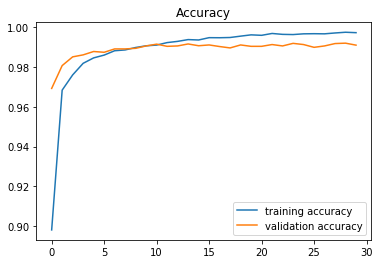

In [34]:
plot_accuracy(history)

And loss calculation:

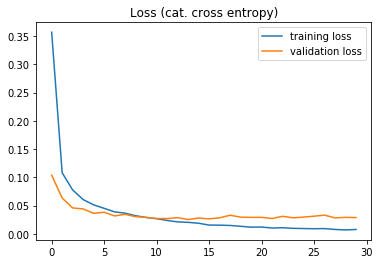

In [35]:
plot_loss(history)

For different hyperparameters:

In [10]:
num_layers= 20
kernel_size= 3
stride = 2

In [11]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 24s - loss: 0.5187 - acc: 0.8524 - val_loss: 0.1944 - val_acc: 0.9460
Epoch 2/10
 - 2s - loss: 0.2033 - acc: 0.9388 - val_loss: 0.1323 - val_acc: 0.9623
Epoch 3/10
 - 2s - loss: 0.1541 - acc: 0.9529 - val_loss: 0.1038 - val_acc: 0.9703
Epoch 4/10
 - 2s - loss: 0.1289 - acc: 0.9599 - val_loss: 0.0836 - val_acc: 0.9740
Epoch 5/10
 - 2s - loss: 0.1124 - acc: 0.9651 - val_loss: 0.0788 - val_acc: 0.9757
Epoch 6/10
 - 2s - loss: 0.0974 - acc: 0.9699 - val_loss: 0.0671 - val_acc: 0.9785
Epoch 7/10
 - 2s - loss: 0.0881 - acc: 0.9728 - val_loss: 0.0590 - val_acc: 0.9817
Epoch 8/10
 - 2s - loss: 0.0806 - acc: 0.9748 - val_loss: 0.0561 - val_acc: 0.9826
Epoch 9/10
 - 2s - loss: 0.0723 - acc: 0.9778 - val_loss: 0.0488 - val_acc: 0.9845
Epoch 10/10
 - 2s - loss: 0.0668 - acc: 0.9789 - val_loss: 0.0492 - val_acc: 0.9835
Baseline Error: 1.65%


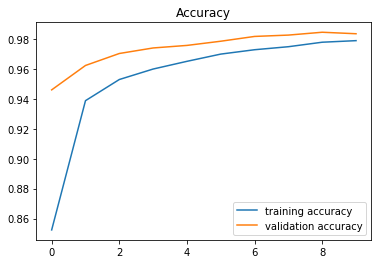

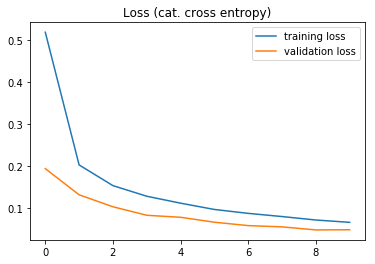

In [13]:
plot_accuracy(history)
plot_loss(history)

In [14]:
num_layers= 20
kernel_size= 7
stride = 2

In [15]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.4285 - acc: 0.8774 - val_loss: 0.1230 - val_acc: 0.9664
Epoch 2/10
 - 2s - loss: 0.1336 - acc: 0.9601 - val_loss: 0.0768 - val_acc: 0.9770
Epoch 3/10
 - 2s - loss: 0.0974 - acc: 0.9701 - val_loss: 0.0597 - val_acc: 0.9824
Epoch 4/10
 - 2s - loss: 0.0812 - acc: 0.9749 - val_loss: 0.0509 - val_acc: 0.9836
Epoch 5/10
 - 2s - loss: 0.0708 - acc: 0.9786 - val_loss: 0.0457 - val_acc: 0.9851
Epoch 6/10
 - 2s - loss: 0.0600 - acc: 0.9816 - val_loss: 0.0406 - val_acc: 0.9865
Epoch 7/10
 - 2s - loss: 0.0553 - acc: 0.9831 - val_loss: 0.0377 - val_acc: 0.9877
Epoch 8/10
 - 2s - loss: 0.0509 - acc: 0.9840 - val_loss: 0.0354 - val_acc: 0.9886
Epoch 9/10
 - 2s - loss: 0.0460 - acc: 0.9850 - val_loss: 0.0337 - val_acc: 0.9898
Epoch 10/10
 - 2s - loss: 0.0433 - acc: 0.9865 - val_loss: 0.0344 - val_acc: 0.9885
Baseline Error: 1.15%


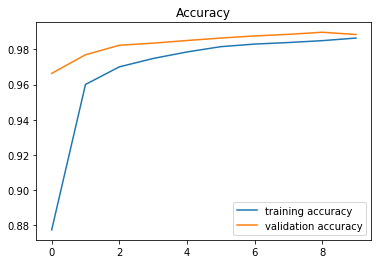

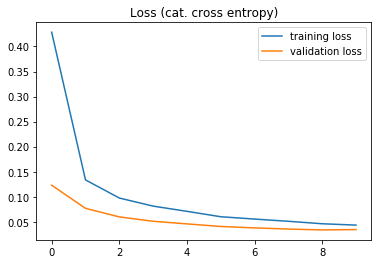

In [16]:
plot_accuracy(history)
plot_loss(history)

In [17]:
num_layers= 20
kernel_size= 10
stride = 2

In [18]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.3790 - acc: 0.8899 - val_loss: 0.1117 - val_acc: 0.9640
Epoch 2/10
 - 2s - loss: 0.1197 - acc: 0.9638 - val_loss: 0.0745 - val_acc: 0.9761
Epoch 3/10
 - 2s - loss: 0.0877 - acc: 0.9732 - val_loss: 0.0532 - val_acc: 0.9839
Epoch 4/10
 - 2s - loss: 0.0721 - acc: 0.9776 - val_loss: 0.0452 - val_acc: 0.9861
Epoch 5/10
 - 2s - loss: 0.0608 - acc: 0.9811 - val_loss: 0.0415 - val_acc: 0.9868
Epoch 6/10
 - 2s - loss: 0.0523 - acc: 0.9834 - val_loss: 0.0383 - val_acc: 0.9873
Epoch 7/10
 - 2s - loss: 0.0473 - acc: 0.9851 - val_loss: 0.0369 - val_acc: 0.9872
Epoch 8/10
 - 2s - loss: 0.0424 - acc: 0.9865 - val_loss: 0.0318 - val_acc: 0.9882
Epoch 9/10
 - 2s - loss: 0.0401 - acc: 0.9869 - val_loss: 0.0316 - val_acc: 0.9901
Epoch 10/10
 - 2s - loss: 0.0362 - acc: 0.9883 - val_loss: 0.0300 - val_acc: 0.9904
Baseline Error: 0.96%


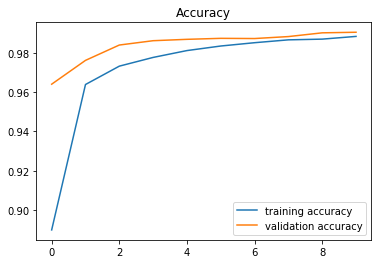

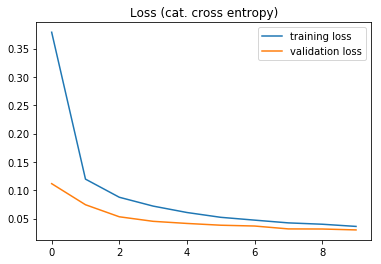

In [19]:
plot_accuracy(history)
plot_loss(history)

In [30]:
num_layers= 40
kernel_size= 10
stride = 2

In [31]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.3093 - acc: 0.9137 - val_loss: 0.0903 - val_acc: 0.9743
Epoch 2/10
 - 3s - loss: 0.0869 - acc: 0.9739 - val_loss: 0.0566 - val_acc: 0.9826
Epoch 3/10
 - 3s - loss: 0.0635 - acc: 0.9805 - val_loss: 0.0416 - val_acc: 0.9866
Epoch 4/10
 - 3s - loss: 0.0504 - acc: 0.9846 - val_loss: 0.0391 - val_acc: 0.9868
Epoch 5/10
 - 3s - loss: 0.0432 - acc: 0.9861 - val_loss: 0.0351 - val_acc: 0.9876
Epoch 6/10
 - 3s - loss: 0.0392 - acc: 0.9872 - val_loss: 0.0309 - val_acc: 0.9886
Epoch 7/10
 - 3s - loss: 0.0323 - acc: 0.9900 - val_loss: 0.0301 - val_acc: 0.9895
Epoch 8/10
 - 3s - loss: 0.0293 - acc: 0.9908 - val_loss: 0.0268 - val_acc: 0.9910
Epoch 9/10
 - 3s - loss: 0.0272 - acc: 0.9912 - val_loss: 0.0324 - val_acc: 0.9882
Epoch 10/10
 - 3s - loss: 0.0232 - acc: 0.9927 - val_loss: 0.0276 - val_acc: 0.9905
Baseline Error: 0.95%


In [36]:
num_layers= 30
kernel_size= 7
stride = 1

In [37]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2264 - acc: 0.9346 - val_loss: 0.0733 - val_acc: 0.9774
Epoch 2/10
 - 4s - loss: 0.0676 - acc: 0.9795 - val_loss: 0.0440 - val_acc: 0.9850
Epoch 3/10
 - 4s - loss: 0.0474 - acc: 0.9856 - val_loss: 0.0378 - val_acc: 0.9877
Epoch 4/10
 - 4s - loss: 0.0359 - acc: 0.9889 - val_loss: 0.0387 - val_acc: 0.9871
Epoch 5/10
 - 4s - loss: 0.0290 - acc: 0.9905 - val_loss: 0.0350 - val_acc: 0.9884
Epoch 6/10
 - 4s - loss: 0.0245 - acc: 0.9921 - val_loss: 0.0285 - val_acc: 0.9904
Epoch 7/10
 - 4s - loss: 0.0204 - acc: 0.9935 - val_loss: 0.0279 - val_acc: 0.9913
Epoch 8/10
 - 4s - loss: 0.0159 - acc: 0.9950 - val_loss: 0.0333 - val_acc: 0.9890
Epoch 9/10
 - 4s - loss: 0.0143 - acc: 0.9955 - val_loss: 0.0282 - val_acc: 0.9902
Epoch 10/10
 - 4s - loss: 0.0118 - acc: 0.9963 - val_loss: 0.0270 - val_acc: 0.9907
Baseline Error: 0.93%


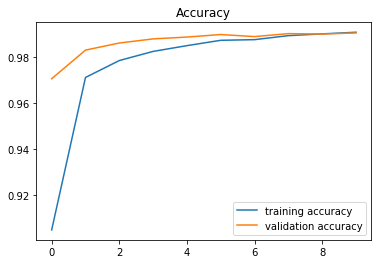

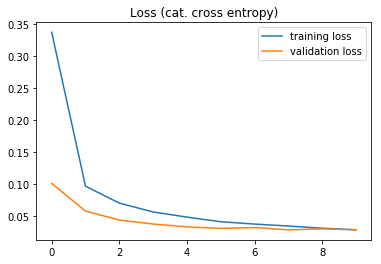

In [43]:
plot_accuracy(history)
plot_loss(history)

In [41]:
num_layers= 40
kernel_size= 10
stride = 2

In [42]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.3377 - acc: 0.9047 - val_loss: 0.1006 - val_acc: 0.9707
Epoch 2/10
 - 2s - loss: 0.0963 - acc: 0.9713 - val_loss: 0.0572 - val_acc: 0.9832
Epoch 3/10
 - 2s - loss: 0.0697 - acc: 0.9787 - val_loss: 0.0432 - val_acc: 0.9863
Epoch 4/10
 - 2s - loss: 0.0559 - acc: 0.9826 - val_loss: 0.0369 - val_acc: 0.9881
Epoch 5/10
 - 2s - loss: 0.0478 - acc: 0.9852 - val_loss: 0.0325 - val_acc: 0.9889
Epoch 6/10
 - 2s - loss: 0.0405 - acc: 0.9875 - val_loss: 0.0300 - val_acc: 0.9900
Epoch 7/10
 - 2s - loss: 0.0369 - acc: 0.9878 - val_loss: 0.0315 - val_acc: 0.9891
Epoch 8/10
 - 2s - loss: 0.0338 - acc: 0.9895 - val_loss: 0.0277 - val_acc: 0.9904
Epoch 9/10
 - 2s - loss: 0.0304 - acc: 0.9903 - val_loss: 0.0293 - val_acc: 0.9902
Epoch 10/10
 - 2s - loss: 0.0280 - acc: 0.9910 - val_loss: 0.0278 - val_acc: 0.9907
Baseline Error: 0.93%


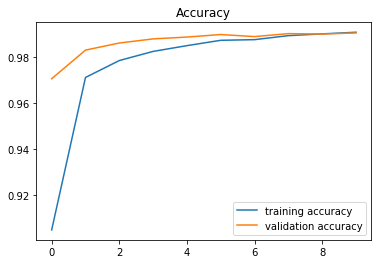

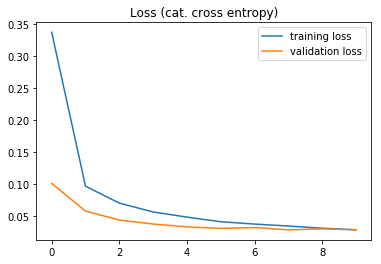

In [44]:
plot_accuracy(history)
plot_loss(history)

After several tries, we conclude that the best baseline error obtained is 0.93%, using 30 layers, a 7-size kernel and 1 stride. Increasing this hyperparameters (for exemple, 40 layers, 10-size kernel and 2 strides), the results don't vary significantly, but the processing time does. If we continue increasing this values, an overfitting may happen, improving the results in the training set but decreasing in validation and test.